# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [1]:
import pandas as pd

# Load data
df = pd.read_csv(
    'data/reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [2]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


Split data into a training and test set to evaluate model performance.

In [3]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

# Your Work

## Data Exploration

In [5]:
# Find data types and number of null entries
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.1+ MB
<class 'pandas.core.series.Series'>
RangeIndex: 18442 entries, 0 to 18441
Series name: Recommended IND
Non-Null Count  Dtype
--------------  -----
18442 non-null  int64
dtypes: int64(1)
memory usage: 144.2 KB


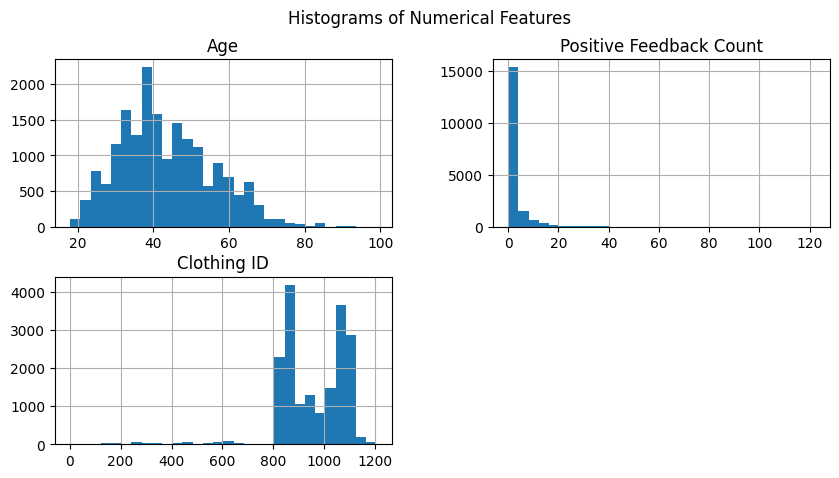

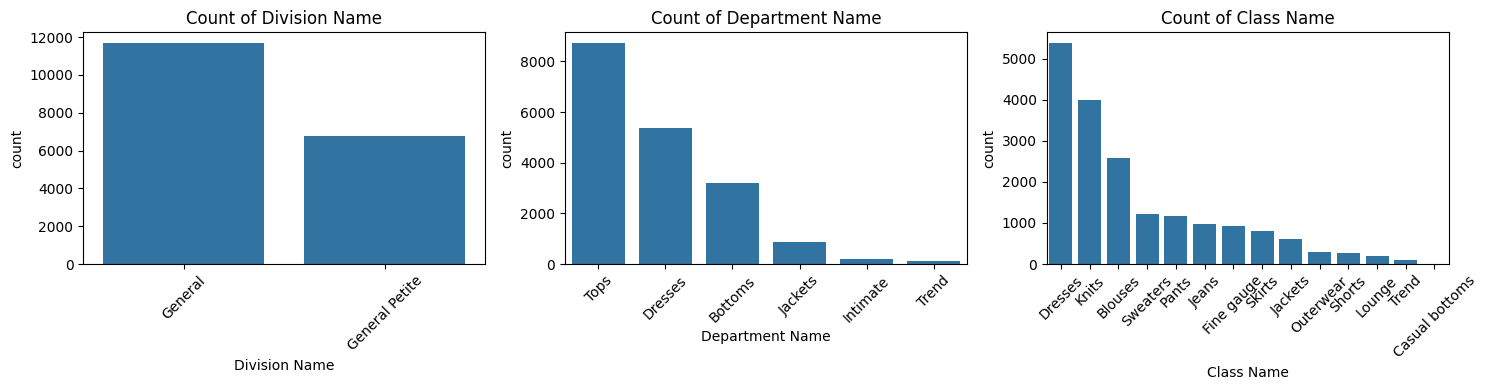

In [ ]:
# Plot histograms for numerical features
import seaborn as sns
import matplotlib.pyplot as plt
numerical_features = ['Age', 'Positive Feedback Count']
df[numerical_features].hist(bins=30, figsize=(10, 5))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Plot bar plots for categorical features
categorical_features = ['Division Name', 'Department Name', 'Class Name']
plt.figure(figsize=(15, 4))
for i, col in enumerate(categorical_features):
    plt.subplot(1, 3, i+1)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

## Building Pipeline

In [ ]:
# Only need to run this once
# ! python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 12.8/12.8 MB 80.4 MB/s  0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [11]:
import spacy

nlp = spacy.load("en_core_web_sm")

### Splitting data into numerical, categorical and text data

In [12]:
# Import necessary library to create a pipeline
from sklearn.pipeline import Pipeline

Define numerical, categorical and text features.

In [24]:
num_features = (
    X
    .select_dtypes(include=['int64', 'float64']).columns
    .drop(
        [
            'Clothing ID', # Treat Clothing ID as a categorical variable
        ],
    )
)

print('Numerical features are:', num_features)

cat_features = (
    X.select_dtypes(include=['object']).columns
    .drop(
        [
            'Title',
            'Review Text',
        ],
    )
    .append(pd.Index(['Clothing ID']))  # Treat Clothing ID as a categorical variable
)

print('Categorical features are:', cat_features)

text_features = (
    X[['Title', 'Review Text']].columns
)

print('Text features are:', text_features)


Numerical features are: Index(['Age', 'Positive Feedback Count'], dtype='object')
Categorical features are: Index(['Division Name', 'Department Name', 'Class Name', 'Clothing ID'], dtype='object')
Text features are: Index(['Title', 'Review Text'], dtype='object')


### Define a Numerical Features Pipeline

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline

# Use ColumnTransformer to apply different scalers to age (approximately normally distributed)
# and positive feedback count (skewed distribution)

num_transformer = ColumnTransformer([
    ('age_scaler', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), ['Age']),
    ('feedback_scaler', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', MinMaxScaler())
    ]), ['Positive Feedback Count'])
])

num_transformer

,transformers,"[('age_scaler', ...), ('feedback_scaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


### Define a Categorical Features Pipeline

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

cat_pipeline = Pipeline([
    ('ordinal_encoder',
     OrdinalEncoder(
         handle_unknown='use_encoded_value',
         unknown_value=-1,
     )
     ),
    (
        'imputer',
        SimpleImputer(
            strategy='most_frequent',
        )
    ),
    (
        'cat_encoder',
        OneHotEncoder(
            sparse_output=False,
            handle_unknown='ignore',
        )
    ),
])

cat_pipeline

,steps,"[('ordinal_encoder', ...), ('imputer', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,categories,'auto'
,dtype,<class 'numpy.float64'>
,handle_unknown,'use_encoded_value'
,unknown_value,-1
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


### Define a Text Features Pipeline

In [29]:
# Create Custom Transformer to count number of times a character appears
from sklearn.base import BaseEstimator, TransformerMixin

class CharCountTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, char):
        self.char = char

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [[text.count(self.char) for text in X]]

Using this custom transformer to count the number of spaces, exclamations and question marks in the text after ensuring text is in the correct format through preprocessing.

## Training Pipeline

## Fine-Tuning Pipeline